In [39]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/symptom2disease/Symptom2Disease.csv


In [40]:
df=pd.read_csv('/kaggle/input/symptom2disease/Symptom2Disease.csv')
df.head(10)

,Unnamed: 0,label,text
0,0,Psoriasis,I have been experiencing a skin rash on my arm...
1,1,Psoriasis,"My skin has been peeling, especially on my kne..."
2,2,Psoriasis,I have been experiencing joint pain in my fing...
3,3,Psoriasis,"There is a silver like dusting on my skin, esp..."
4,4,Psoriasis,"My nails have small dents or pits in them, and..."
5,5,Psoriasis,The skin on my palms and soles is thickened an...
6,6,Psoriasis,"The skin around my mouth, nose, and eyes is re..."
7,7,Psoriasis,My skin is very sensitive and reacts easily to...
8,8,Psoriasis,I have noticed a sudden peeling of skin at dif...
9,9,Psoriasis,The skin on my genitals is red and inflamed. I...


In [41]:
df['label'].isnull().sum()
df['text'].isnull().sum()

0

In [42]:
import re
import string
exp=re.compile(r'<[^>]+>')
punc=(string.punctuation)
def remove_html(text):
    res=exp.sub('',text)
    return res.translate(str.maketrans('', '', punc))
df['text']=df['text'].apply(remove_html)
df['text']=df['text'].str.lower()

In [43]:
from nltk.corpus import stopwords
def remove_stopwords(text):
    temp=stopwords.words('english')
    new_text=[]
    for word in text.split():
        if word in temp:
            new_text.append('')
        else:
            new_text.append(word)
    x=new_text[:]
    #print(x)
    new_text.clear()
    return ' '.join(x)
df['text']=df['text'].apply(remove_stopwords)

In [44]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
def stemmer(text):
    return [ps.stem(text)]

df['text']=df['text'].apply(stemmer)

In [45]:
corpus=[]
for i in range(len(df['text'])):
    corpus.append(*(df['text'][i]))
#print(corpus)

In [46]:
temp=list(enumerate(df['label'].unique()))
label={}
for i,j in temp:
    label[j]=i
label

{'Psoriasis': 0,
 'Varicose Veins': 1,
 'Typhoid': 2,
 'Chicken pox': 3,
 'Impetigo': 4,
 'Dengue': 5,
 'Fungal infection': 6,
 'Common Cold': 7,
 'Pneumonia': 8,
 'Dimorphic Hemorrhoids': 9,
 'Arthritis': 10,
 'Acne': 11,
 'Bronchial Asthma': 12,
 'Hypertension': 13,
 'Migraine': 14,
 'Cervical spondylosis': 15,
 'Jaundice': 16,
 'Malaria': 17,
 'urinary tract infection': 18,
 'allergy': 19,
 'gastroesophageal reflux disease': 20,
 'drug reaction': 21,
 'peptic ulcer disease': 22,
 'diabetes': 23}

In [47]:
def labelling(disease):
    return label[disease]
df['label_num']=df['label'].apply(labelling)
df['label_num']

0        0
1        0
2        0
3        0
4        0
        ..
1195    23
1196    23
1197    23
1198    23
1199    23
Name: label_num, Length: 1200, dtype: int64

<AxesSubplot:xlabel='label_num', ylabel='count'>

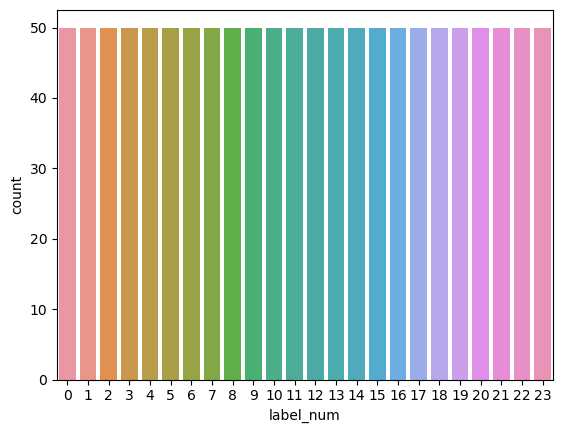

In [48]:
import seaborn as sns
sns.countplot(x='label_num',data=df)

In [49]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
tokenizer_obj=Tokenizer(oov_token='<nothing>')
tokenizer_obj.fit_on_texts(corpus)

In [50]:
sequences=tokenizer_obj.texts_to_sequences(corpus)
print(sequences[0])
from keras.utils import pad_sequences
sequence=pad_sequences(sequences,padding='post')
print(sequence[0:2])
max_len=len(sequence[0])
max_len

[12, 4, 20, 61, 45, 753, 216, 632, 22, 60, 251, 74, 905, 1128]
[[  12    4   20   61   45  753  216  632   22   60  251   74  905 1128
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0]
 [   4  290  137  376  423  467  290   63  128  185  906  633    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0]]


30

In [51]:
vocab_size=tokenizer_obj.word_index
print(len(vocab_size))

1624


In [52]:
y=df['label_num']
from keras.utils import to_categorical
y=to_categorical(y,num_classes=24)

In [53]:
y.shape

(1200, 24)

In [54]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(sequence,df['label_num'],test_size=0.2,random_state=1)

In [55]:
'''x_train.shape
temp=y_train.to_numpy()
y_train=temp.reshape(-1,1)
#y_test=y_test.to_numpy().reshape(-1,1)'''
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(960, 30) (960,) (240, 30) (240,)


In [56]:
y_train

1184    23
771     15
329      6
587     11
746     14
        ..
715     14
905     18
1096    21
235      4
1061    21
Name: label_num, Length: 960, dtype: int64

In [57]:
x_train[0]

array([ 901,  371,  269,  715,  301,  622,  667,  506,  500,   99,  195,
        175,  899, 1118,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0], dtype=int32)

In [58]:
from keras.utils import to_categorical
y_train = to_categorical(y_train, num_classes=24)
y_test = to_categorical(y_test, num_classes=24)


In [59]:
y_train[1]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [60]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,SimpleRNN,Embedding,Flatten,Input,Dropout,LSTM
import keras_tuner as kt

In [61]:
model=Sequential()
model.add(Embedding(1625,100,input_length=30))
model.add(Dropout(0.3))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 30, 100)           162500    
                                                                 
 dropout_2 (Dropout)         (None, 30, 100)           0         
                                                                 
Total params: 162,500
Trainable params: 162,500
Non-trainable params: 0
_________________________________________________________________


In [62]:
model.add(LSTM(60))
model.add(Dropout(0.4))
model.add(Dense(24,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model.summary())
#vocb_size=1625 and each word is represented as 100 dim so total trainable parametrs are:1625*100

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 30, 100)           162500    
                                                                 
 dropout_2 (Dropout)         (None, 30, 100)           0         
                                                                 
 lstm_1 (LSTM)               (None, 60)                38640     
                                                                 
 dropout_3 (Dropout)         (None, 60)                0         
                                                                 
 dense_1 (Dense)             (None, 24)                1464      
                                                                 
Total params: 202,604
Trainable params: 202,604
Non-trainable params: 0
_________________________________________________________________
None


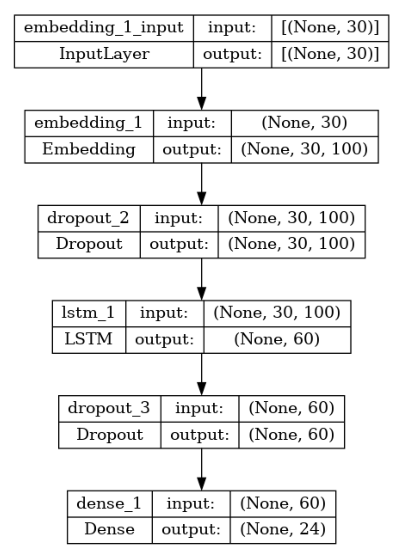

In [63]:
from keras.utils.vis_utils import plot_model
import matplotlib.pyplot as plt

plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)
image = plt.imread('model_plot.png')
plt.figure(figsize=(9,7))
plt.imshow(image)
plt.axis('off')
plt.show()

In [64]:
x_train.shape

(960, 30)

In [65]:
history=model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=50)

Epoch 1/50
30/30 [==============================] - 4s 43ms/step - loss: 3.1797 - accuracy: 0.0469 - val_loss: 3.1728 - val_accuracy: 0.0583
Epoch 2/50
30/30 [==============================] - 1s 22ms/step - loss: 3.0917 - accuracy: 0.0812 - val_loss: 2.9349 - val_accuracy: 0.0958
Epoch 3/50
30/30 [==============================] - 1s 26ms/step - loss: 2.7591 - accuracy: 0.1042 - val_loss: 2.6188 - val_accuracy: 0.1500
Epoch 4/50
30/30 [==============================] - 1s 22ms/step - loss: 2.4755 - accuracy: 0.1552 - val_loss: 2.4111 - val_accuracy: 0.1917
Epoch 5/50
30/30 [==============================] - 1s 22ms/step - loss: 2.2281 - accuracy: 0.2240 - val_loss: 2.2144 - val_accuracy: 0.2333
Epoch 6/50
30/30 [==============================] - 1s 22ms/step - loss: 1.9980 - accuracy: 0.3031 - val_loss: 1.9494 - val_accuracy: 0.3958
Epoch 7/50
30/30 [==============================] - 1s 22ms/step - loss: 1.6962 - accuracy: 0.4323 - val_loss: 1.6374 - val_accuracy: 0.5167
Epoch 8/50
30

In [66]:
y_pred=model.predict(x_test)

8/8 [==============================] - 1s 7ms/step


In [67]:
from sklearn import metrics

In [68]:
metrics.mean_squared_error(y_test,y_pred)


0.0095242895

In [69]:
import matplotlib.pyplot as plt

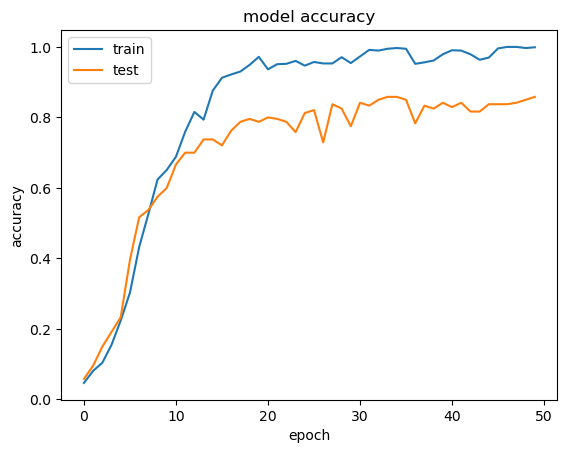

In [70]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

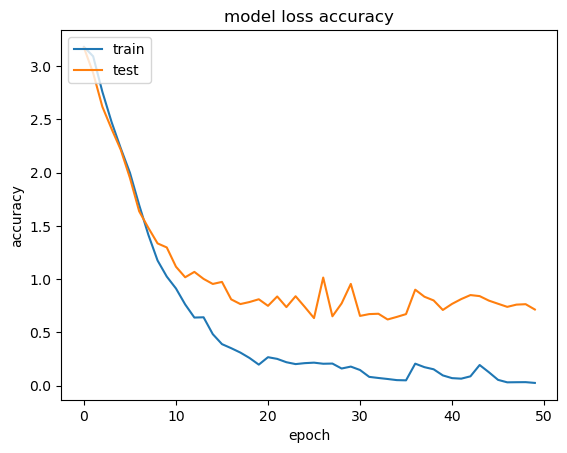

In [71]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [72]:
random_text='The most common symptom is a rash on the skin, but sometimes the rash involves the nails or joints.'
text=remove_html(random_text)
text=text.lower()
text=remove_stopwords(text)
text=stemmer(text)
text

['  common symptom   rash   skin  sometimes  rash involves  nails  joint']

In [73]:
tokenizer_obj.fit_on_texts(text)
sequences=tokenizer_obj.texts_to_sequences(text)
sequences

[[702, 657, 19, 4, 70, 19, 1625, 264, 206]]

In [74]:
sequence1=pad_sequences(sequences,padding='post',maxlen=30)
sequence1

array([[ 702,  657,   19,    4,   70,   19, 1625,  264,  206,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0]], dtype=int32)

In [75]:
y_pred.max()

0.99847394